## Домашнее задание № 19. Логистическая регрессия и дискриминационный анализ

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

## LDA

In [29]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [30]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [4]:
iris = load_iris()

In [11]:
# загружаем данные в датафрейм
df = pd.DataFrame(iris.data, columns=iris.feature_names)
result = iris.target # необходимый результат записываем в переменную
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
# получаем необходимые параметры
lda_df = df[['sepal length (cm)','sepal width (cm)']].copy()
lda_df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [13]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(lda_df, result, test_size=0.25)

In [14]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [15]:
# обучаем данные
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [19]:
# проверим точность нашей модели
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(x_test))

0.868421052631579

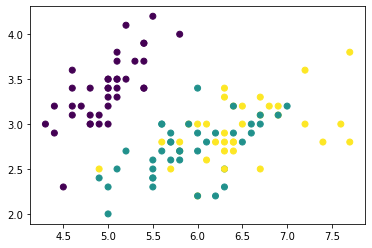

In [17]:
# визуализируем дискриминантную линию 
plt.scatter(x_train['sepal length (cm)'], x_train['sepal width (cm)'], c=y_train)
plt.show()

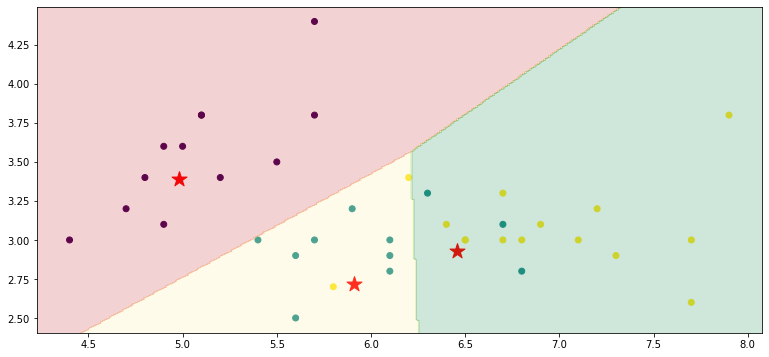

In [35]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6


plt.scatter(x_test['sepal length (cm)'], x_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1],  c='r', s=250, marker='*')
nx, ny = 300, 300
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.2)

## Кластерный анализ

In [38]:
lda_df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# нормализуем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(lda_df)

In [41]:
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

Text(3.2, 200, 'Берем 3 кластера')

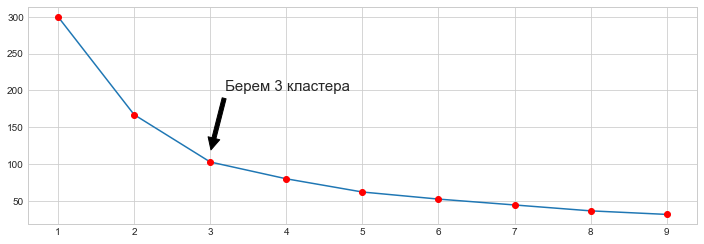

In [56]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

# Add labels to the plot
style = dict(size=10, color='gray')
ax.annotate('Берем 3 кластера', xy=(3, 115), xytext=(3.2, 200),
            arrowprops=dict(facecolor='black', shrink=0.05),size=15)

In [44]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)

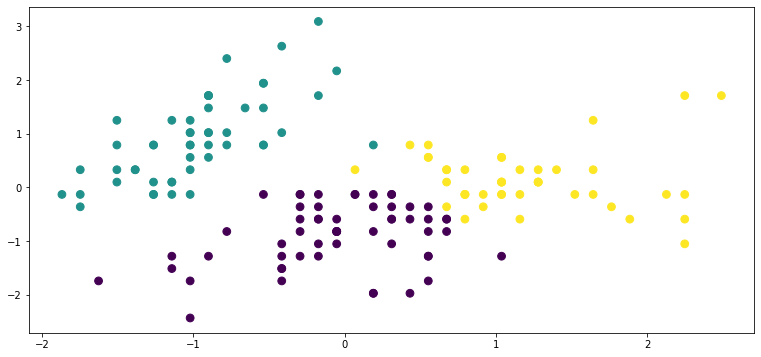

In [47]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)